# Churn Reduction Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Visualization Libraries
import matplotlib.pyplot as plt
import pydotplus
from pylab import figure, axes, pie, title, show
import seaborn as sns
from IPython.display import Image  
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,5]


In [26]:
#Model Libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from imblearn.over_sampling import SMOTE
from sklearn import ensemble
#from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors

#from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

In [49]:
customer_df = pd.read_csv('churn_train_data.csv') 

In [5]:
#given_test = pd.read_csv('churn_test_data.csv')

In [50]:
#customer_df = pd.concat([given_train,given_test]) #merging to avoid multiple data transformations
target = customer_df['Churn']
states_ = customer_df['state']

In [51]:
customer_df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [52]:
customer_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Variable Transformations

Data Preprocessing

In [53]:
customer_df.drop('phone number',axis = 1, inplace = True) #dropping the unique values 

In [54]:
encoder = preprocessing.LabelEncoder()

In [55]:
customer_df['state'] = encoder.fit_transform(customer_df['state'])
customer_df['international plan'] = encoder.fit_transform(customer_df['international plan'])
customer_df['voice mail plan'] = encoder.fit_transform(customer_df['voice mail plan'])
customer_df['Churn'] = encoder.fit_transform(customer_df['Churn'])

# Correlation Heatmap


BI-Variate Analysis

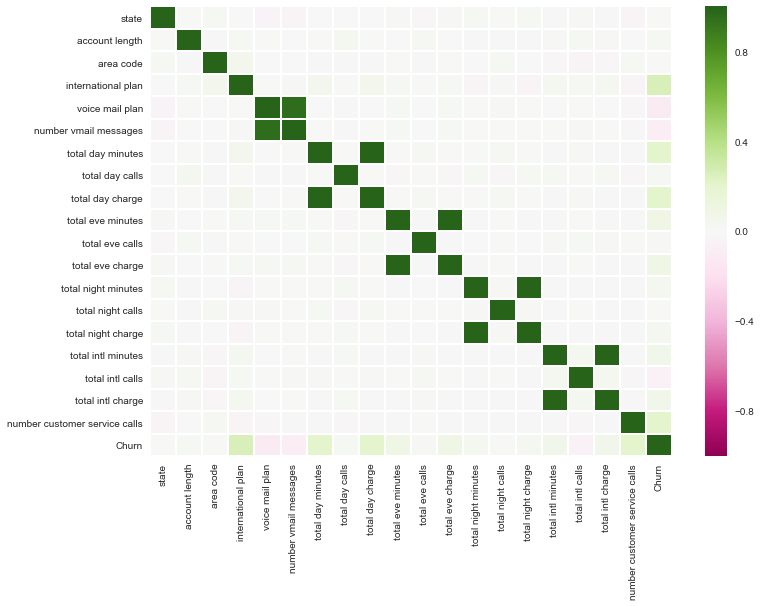

In [56]:
correlations = customer_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(correlations,cmap="PiYG",ax=ax,linecolor='white',linewidths=1)
fig.savefig("heatmap.png")

In [57]:
#dropping redundant variables
customer_df.drop(['number vmail messages','total day charge','total eve charge','total night charge','total intl charge'],axis = 1, inplace = True)

BI-Variate Analysis for Target Class


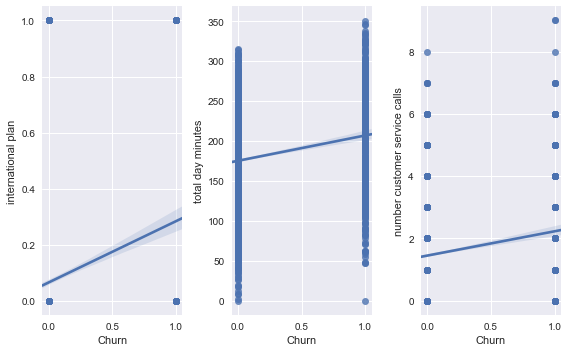

In [58]:
l = ['international plan','total day minutes','number customer service calls']
for i in range(0,3):
    plt.subplot(1,3,i+1)
    target_plot = sns.regplot(x = 'Churn', y = l[i], data = customer_df)
    plt.tight_layout()

Conclusion: Three important parameters for Churning i) International Plan ii) Total Day Minutes iii) Number of Customer Service Calls

# Geographical Plotting


Mapping variables for geographical plotting


In [59]:
states = states_.value_counts()
state_ls = list(states.index)
state_vs = list(states.values)


libraries required for a geographical plotting


In [60]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

environment setup for the figures to show up in the notebook:

In [61]:
init_notebook_mode(connected=True) 

variable of dictionary type to pass into the choromap


In [62]:
data = dict(type='choropleth',
            colorscale = 'Picnic',
            locations = state_ls,
            z = state_vs,
            locationmode = 'USA-states',
            text = target,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Total Customers"}
            )

specifications for the layout

In [63]:
layout = dict(title = 'US Customers Heatmap by State',
              geo = dict(scope='usa'))

parameters passing into the choromap


In [64]:
choromap = go.Figure(data = [data],layout = layout)

command plotting the choromap

In [65]:
iplot(choromap)

Conclusions:
i) WV(West Virginia) has a higest of 158 Customers
ii) CA (California) has the least 52 Customers

This concludes of a target class imbalance on the dataset

# Pairplots for plotting relations

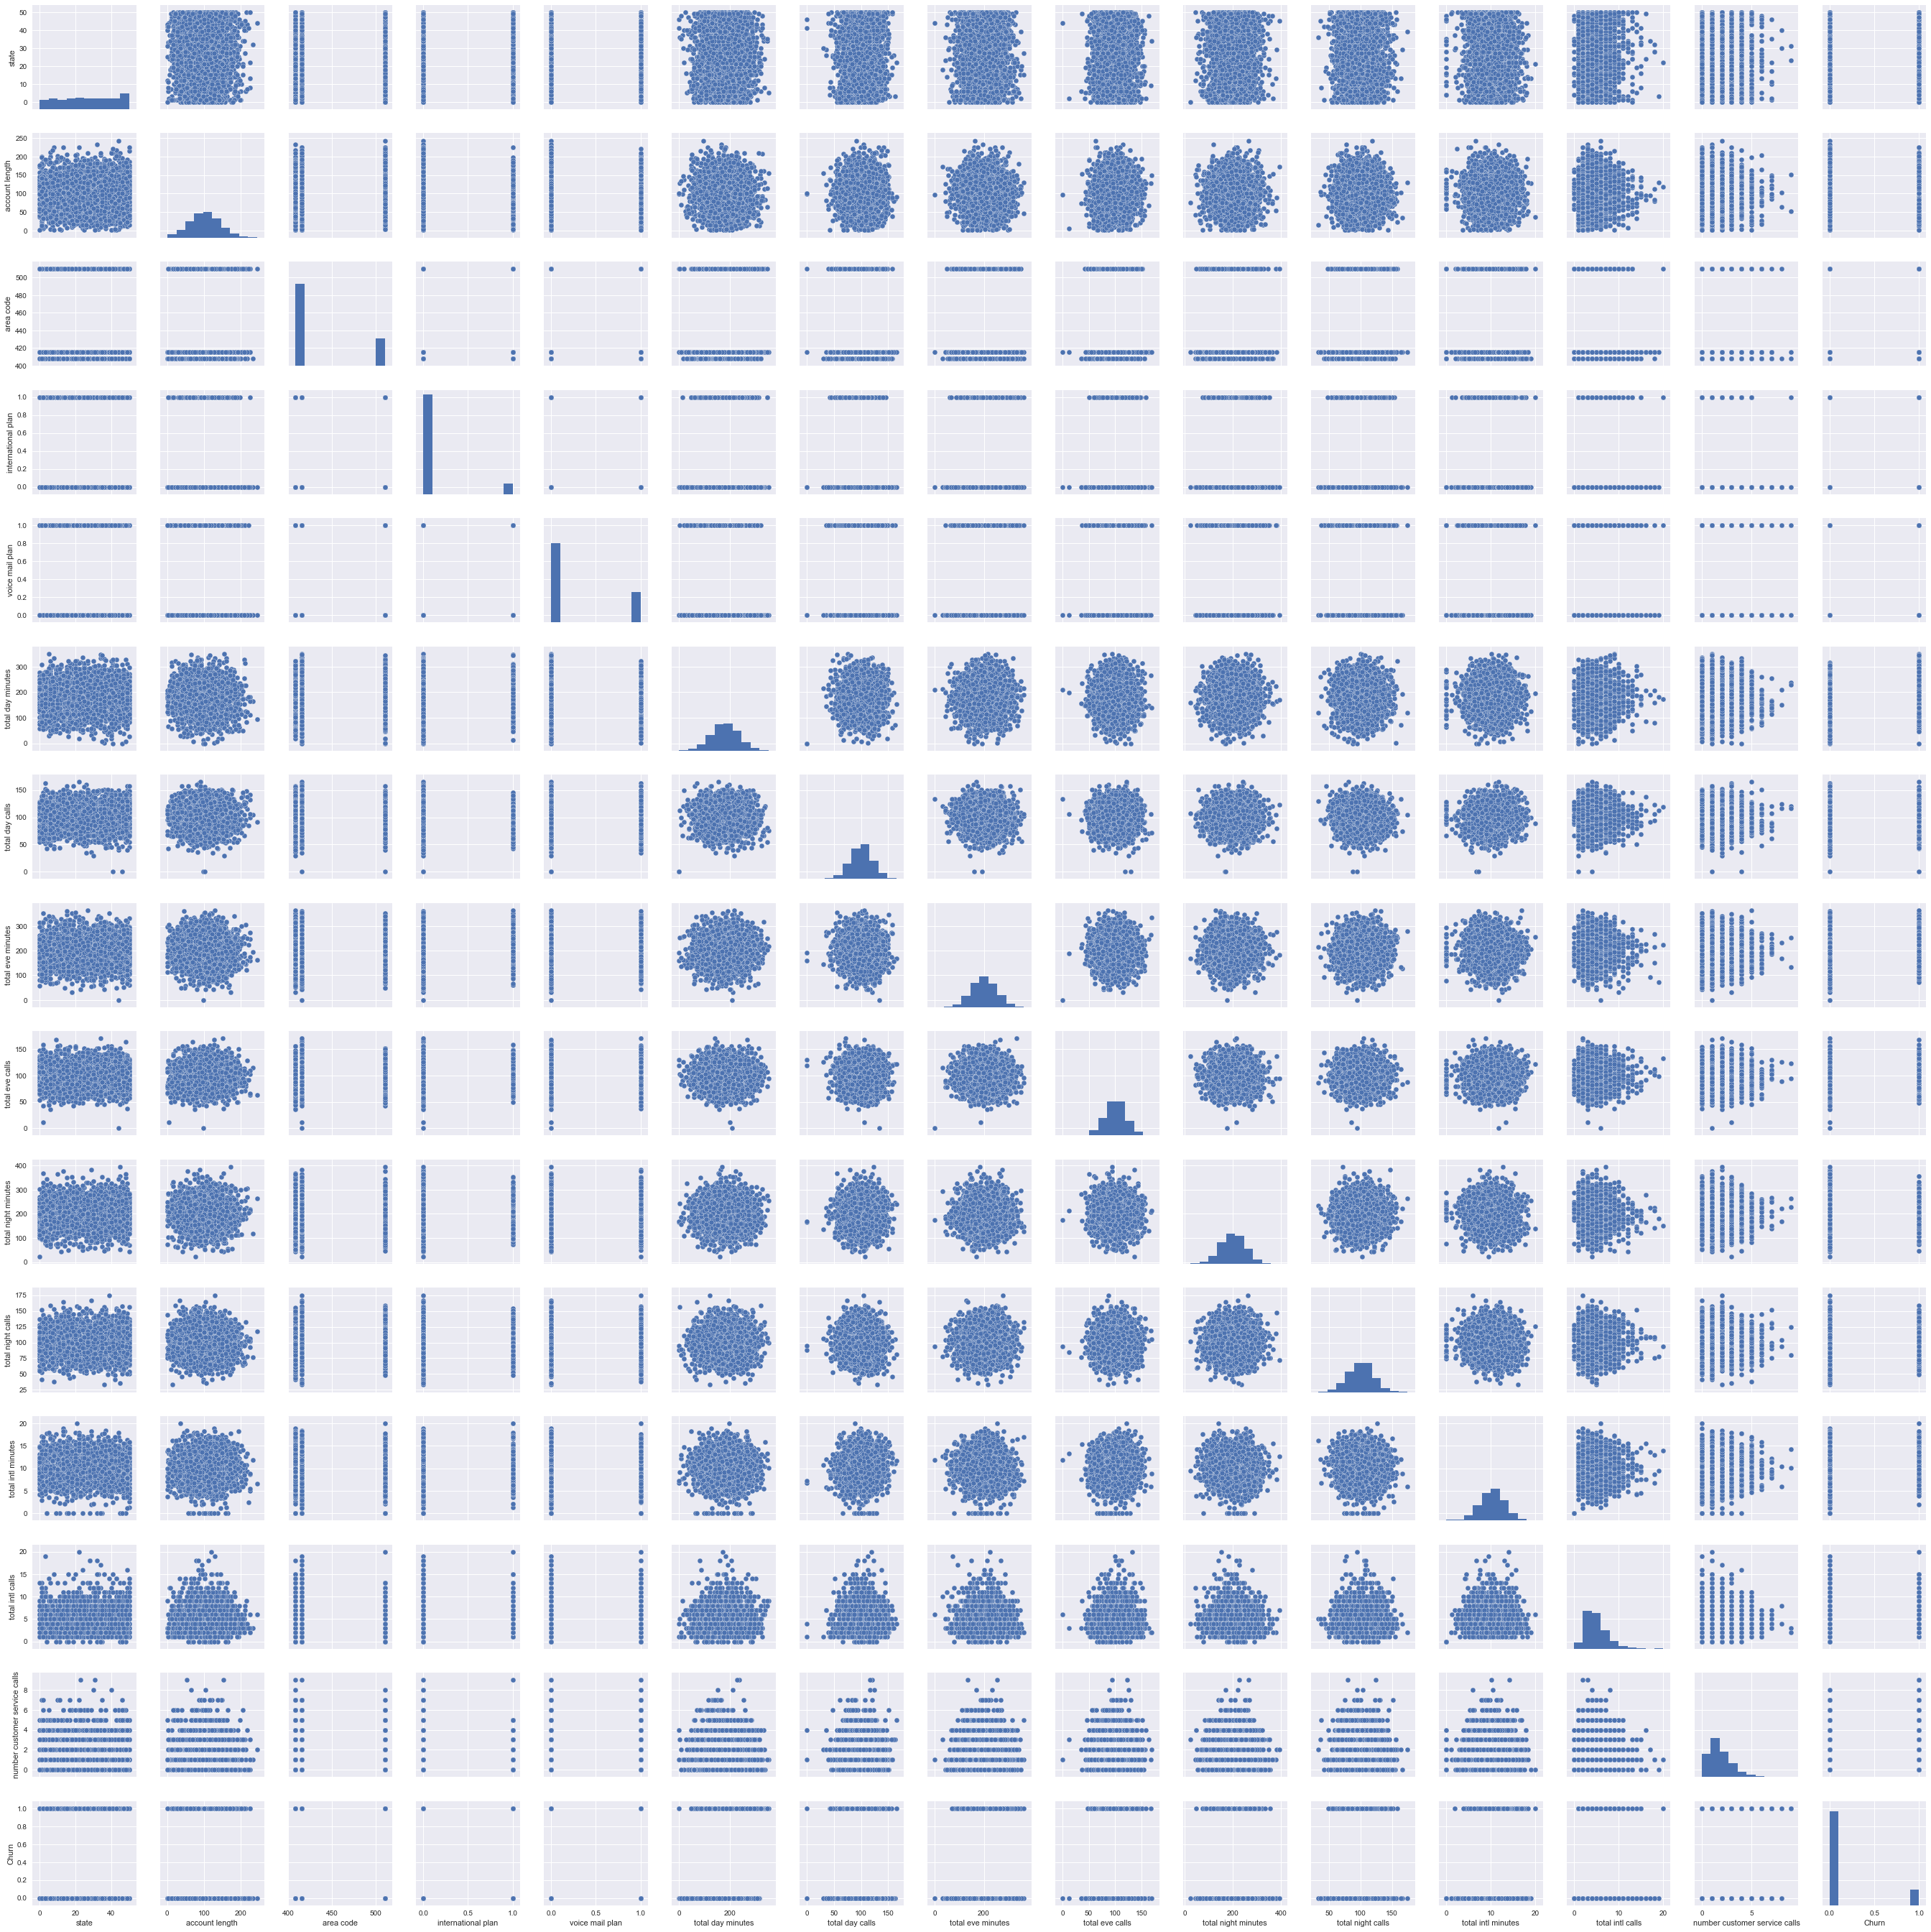

In [66]:
sns.pairplot(customer_df,palette='coolwarm',size = 2.5)

# Target Class Distribution



In [67]:
dv = target.value_counts()
dv = pd.DataFrame(dv)
dv.reset_index(inplace = True)
dv

,index,Churn
0,False.,2850
1,True.,483


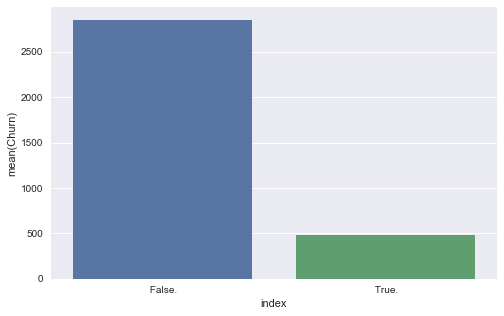

In [68]:
sns.barplot(x = dv['index'],y = dv['Churn'])

# Model Development

Models on Imbalanced Target Class with Scaled data

In [69]:
y = customer_df['Churn'].as_matrix().astype(np.int)
y.size

3333

In [70]:
X = customer_df.as_matrix().astype(np.float)
X.shape

(3333, 15)

In [71]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #Test,train split using sklearn

# #model instances
# model_dt_imb = DecisionTreeClassifier()
# model_KNN_imb = KNeighborsClassifier()
# model_Log_imb= LogisticRegression()
# model_RF_imb = RandomForestClassifier(n_estimators=100)


# #model training
# model_dt_imb.fit(X_train,y_train)
# model_KNN_imb.fit(X_train,y_train)
# model_Log_imb.fit(X_train,y_train)
# model_RF_imb.fit(X_train,y_train)

# #model predictions
# pred_dt_imb = model_dt_imb.predict(X_test)
# pred_KNN_imb = model_KNN_imb.predict(X_test)
# pred_Log_imb = model_Log_imb.predict(X_test)
# pred_RF_imb = model_RF_imb.predict(X_test)


In [72]:
from sklearn.model_selection import StratifiedKFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

10

In [73]:
ensembles = [ensemble.GradientBoostingClassifier(),svm.SVC(),ensemble.RandomForestClassifier(),neighbors.KNeighborsClassifier(),
            LogisticRegression()]


In [74]:
method = ['GBM','SVM','Random Forest','KNN','Logistic Regression']

In [75]:
for methods in range(0,5):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = ensembles[methods]
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    print(method[methods])
    print(classification_report(y,y_pred))
    fpr, tpr, thresh = metrics.roc_curve(y, y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr,label=method[methods]+str(auc))
    plt.legend(loc=0)

IndexError: index 499 is out of bounds for axis 0 with size 499

Decision_Trees
             precision    recall  f1-score   support

          0       0.96      0.95      0.96      1297
          1       0.71      0.75      0.73       203

avg / total       0.93      0.92      0.92      1500



[[1234   63]
 [  51  152]]
KNN
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1297
          1       0.67      0.27      0.39       203

avg / total       0.87      0.88      0.86      1500



[[1270   27]
 [ 148   55]]
Logistic
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      1297
          1       0.45      0.18      0.26       203

avg / total       0.82      0.86      0.83      1500



[[1252   45]
 [ 166   37]]
RF
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1297
          1       0.92      0.68      0.79       203

avg / total       0.95      0.95      0.95      1500



[[1285   12]
 [  64 

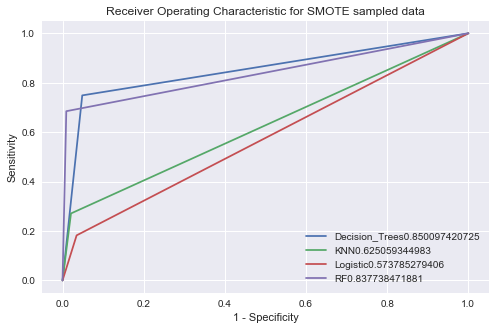

In [103]:
# model_predictions = [pred_dt_imb,pred_KNN_imb,pred_Log_imb,pred_RF_imb] #list for every models predictions
# models = ['Decision_Trees','KNN','Logistic','RF'] #list to specify the model names

# #looping multiple models for plotting a single ROC Curve to evaluate models performance
# for plots in range(0,4):
#     fpr, tpr, thresh = metrics.roc_curve(y_test, model_predictions[plots])
#     auc = metrics.roc_auc_score(y_test, model_predictions[plots])
#     plt.plot(fpr,tpr,label=models[plots]+str(auc))
#     plt.legend(loc=0)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
#     plt.title('Receiver Operating Characteristic for SMOTE sampled data')
#     print(models[plots])
#     print(classification_report(y_test,model_predictions[plots]))
#     print('\n')
#     print(confusion_matrix(y_test,model_predictions[plots]))
#     plt.savefig('Imb_ROC.png')

SMOTE(Synthetic Minority Over-Sampling Technique) method for Target Class Imbalance 


In [104]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)
X_res, y_res = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101) 

In [105]:
dv2 = pd.DataFrame(y_res)
dv2.rename(index = str, columns= {0:'res'},inplace = True)
dv2['res'].value_counts()

1    4293
0    4293
Name: res, dtype: int64

In [106]:
#model instances
model_dt = DecisionTreeClassifier()
model_KNN = KNeighborsClassifier()
model_Log= LogisticRegression()
model_RF = RandomForestClassifier(n_estimators=100)

#model training
model_dt.fit(X_train,y_train)
model_KNN.fit(X_train,y_train)
model_Log.fit(X_train,y_train)
model_RF.fit(X_train,y_train)

#model predictions
pred1 = model_dt.predict(X_test)
pred2 = model_KNN.predict(X_test)
pred3 = model_Log.predict(X_test)
pred4 = model_RF.predict(X_test)


Decision_Trees
             precision    recall  f1-score   support

          0       0.95      0.90      0.93      1304
          1       0.91      0.95      0.93      1272

avg / total       0.93      0.93      0.93      2576

KNN
             precision    recall  f1-score   support

          0       0.98      0.80      0.88      1304
          1       0.83      0.99      0.90      1272

avg / total       0.91      0.89      0.89      2576

Logistic
             precision    recall  f1-score   support

          0       0.80      0.79      0.79      1304
          1       0.79      0.80      0.79      1272

avg / total       0.79      0.79      0.79      2576

RF
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1304
          1       0.97      0.96      0.97      1272

avg / total       0.97      0.97      0.97      2576



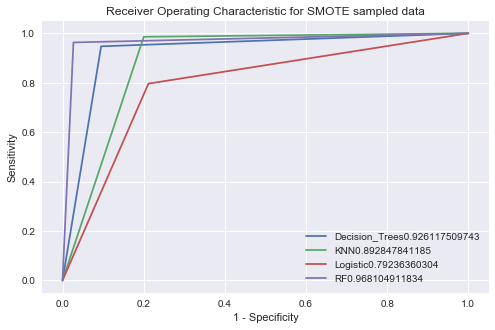

In [107]:
model_predictions = [pred1,pred2,pred3,pred4] #list for every models predictions
models = ['Decision_Trees','KNN','Logistic','RF'] #list to specify the model names

#looping multiple models for plotting a single ROC Curve to evaluate models performance
for plots in range(0,4):
    fpr, tpr, thresh = metrics.roc_curve(y_test, model_predictions[plots])
    auc = metrics.roc_auc_score(y_test, model_predictions[plots])
    plt.plot(fpr,tpr,label=models[plots]+str(auc))
    plt.legend(loc=0)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic for SMOTE sampled data')
    print(models[plots])
    print(classification_report(y_test,model_predictions[plots]))
    plt.savefig('Balanced_ROC.png')

# Final Model Selection

We can finalize the SMOTE sampled data with Random Forest Classifier to obtain better Precision and Accuracy

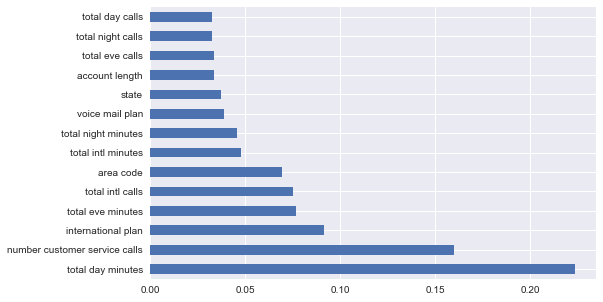

In [133]:
vars_ = (pd.Series(model_RF.feature_importances_, index=customer_df.columns)
   .nlargest(14)
   .plot(kind='barh'))
plt.savefig('varz_imp.png')

The important variables for the churn are:

1. Total day Minutes which relates to the day charges
2. International Plan
3. Number of Customer Service Calls

The company should optimize these parameters to reduce the Customer Churn